In [1]:
import torch

import numpy as np
import matplotlib.pyplot as plt

# Import utils scripts to train, visualize VAEs
import utils
# Import data scripts to generate failure modes data
import data

In [2]:
print(torch.__version__)
torch.cuda.is_available()

1.7.0


False

In [3]:
device = "cpu" # change to device = "cuda" if a cuda GPU is available

### 1. Cross Curve data

$$
\begin{aligned}z & \sim \mathcal{N}(0,1) \\\epsilon & \sim \mathcal{N}\left(0, \sigma_{\epsilon}^{2} \cdot I\right) \\u(z) &=(0.6+1.8 \cdot \Phi(z)) \pi \\ 
x \mid z&=\underbrace{\left[\begin{array}{c}
\frac{\sqrt{2}}{2} \cdot \frac{\cos (u(z))}{\sin (u(z))^{2}+1} \\
\sqrt{2} \cdot \frac{\cos (u(z)) \sin (u(z))}{\sin (u(z))^{2}+1}
\end{array}\right]}_{f_{\theta_{\mathrm{GT}}}(z)}+\epsilon\end{aligned}
$$

here $\Phi(z)$ is the Gaussian $\mathrm{CDF}$ and $\sigma_{\epsilon}^{2}=0.02$

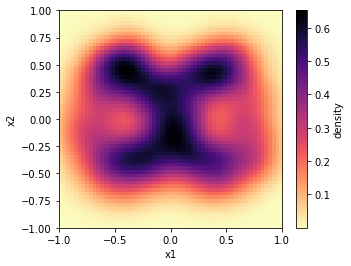

In [4]:
# Prepare data
x_train = data.synthesize_crosscurve(sample_nums=2000)

# Visualize training data pdf
utils.visualize_pdf(x_train, lim=1, c_map= 'magma_r')

In [5]:
# Train with ELBO, and visualize 
# Most arguments of the following functions have reasonable default settings, i list them all here for a pedagogical reason
elbo_vae_instance = utils.train_ELBO_VAE_batched(x_train, 
                                                 x_var=0.02,
                                                 z_dim=1,
                                                 width=50,
                                                 hidden_layers=3,
                                                 learning_rate=0.001,
                                                 S=10,
                                                 n_epochs=5000,
                                                 report_iter=10,
                                                 batch_size=500,
                                                 device=device)
# Or use utils.random_start_ELBO_VAE() for several individual runs

100%|██████████| 5000/5000 [07:54<00:00, 10.54it/s]


In [6]:
# Train with TVO, and visualize 
tvo_vae_instance = utils.train_TVO_VAE_batched(x_train,
                                                x_var=0.02,
                                                z_dim=1,
                                                width=50,
                                                hidden_layers=3,
                                                learning_rate=0.001,
                                                partition=torch.tensor([0.0,0.25,0.50,0.75,1.0]),
                                                S=10,
                                                n_epochs=5000,
                                                report_iter=10,
                                                batch_size=500,
                                                device=device)
# Or use utils.random_start_TVO_VAE() for several individual runs

100%|██████████| 5000/5000 [02:48<00:00, 29.67it/s]


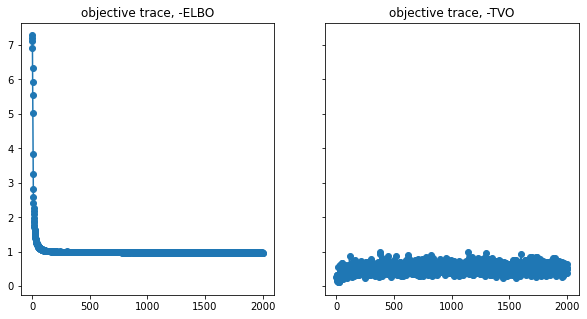

In [7]:
# Plot out the loss function trace
fig, ax=plt.subplots(1,2, figsize=(10,5), sharey=True)
ax[0].plot(elbo_vae_instance.objective_trace, 'o-')
ax[0].set_title('objective trace, -ELBO')
ax[1].plot(tvo_vae_instance.objective_trace, 'o-')
ax[1].set_title('objective trace, -TVO')
plt.show()

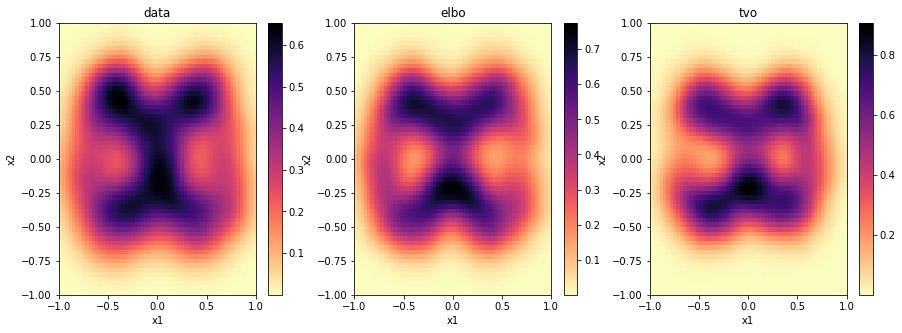

In [8]:
# Visualize PDF by a helper function
utils.compare_VAE(elbo_vae_instance, tvo_vae_instance, x_train,
                 number_samples=10000, x_var=0.02,
                 lim=1,
                 c_map='magma_r')

### 2. Three clusters dataset

$$
\begin{aligned}z & \sim \mathcal{N}(0,1) \\\epsilon & \sim \mathcal{N}\left(0, \sigma_{\epsilon}^{2} \cdot I\right) \\u(z) &=\frac{2 \pi}{1+e^{-\frac{1}{2} \pi z}} \\ t(u)&=2 \cdot \tanh (10 \cdot u-20 \cdot\lfloor u / 2\rfloor-10)+4 \cdot\lfloor u / 2\rfloor+2 \\ x \mid z&=\underbrace{\left[\begin{array}{c}
\cos (t(u(z))) \\
\sin (t(u(z)))
\end{array}\right]}_{f_{\theta_{\mathrm{GT}}}(z)}+\epsilon\end{aligned}
$$

${\sigma}_{\epsilon}^{2}=0.2$

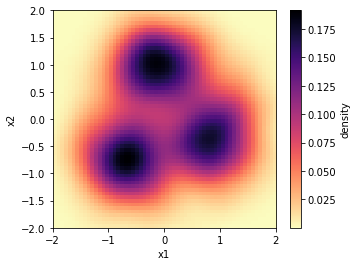

In [9]:
# Prepare data
x_train = data.synthesize_threeclusters(sample_nums=2000)

# Visualize training data pdf
utils.visualize_pdf(x_train, lim=2, c_map= 'magma_r')

In [10]:
# Train with ELBO, and visualize 
# Most arguments of the following functions have reasonable default settings, i list them all here for a pedagogical reason
elbo_vae_instance = utils.train_ELBO_VAE_batched(x_train, 
                                                 x_var=0.2,
                                                 z_dim=1,
                                                 width=50,
                                                 hidden_layers=3,
                                                 learning_rate=0.001,
                                                 S=10,
                                                 n_epochs=5000,
                                                 report_iter=10,
                                                 batch_size=500,
                                                 device=device)
# Or use utils.random_start_ELBO_VAE() for several individual runs

100%|██████████| 5000/5000 [07:49<00:00, 10.66it/s]


In [11]:
# Train with TVO, and visualize 
tvo_vae_instance = utils.train_TVO_VAE_batched(x_train,
                                                x_var=0.2,
                                                z_dim=1,
                                                width=50,
                                                hidden_layers=3,
                                                learning_rate=0.001,
                                                partition=torch.tensor([0.0,0.25,0.50,0.75,1.0]),
                                                S=10,
                                                n_epochs=5000,
                                                report_iter=10,
                                                batch_size=500,
                                                device=device)
# Or use utils.random_start_TVO_VAE() for several individual runs

100%|██████████| 5000/5000 [02:44<00:00, 30.34it/s]


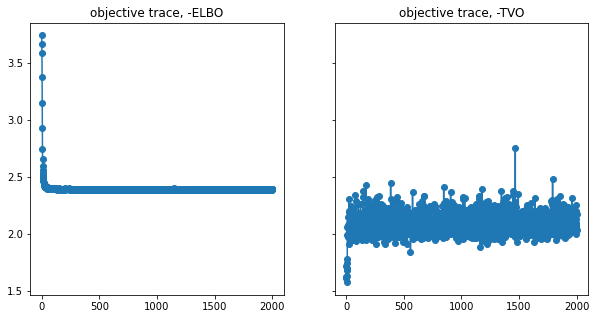

In [12]:
# Plot out the loss function trace
fig, ax=plt.subplots(1,2, figsize=(10,5), sharey=True)
ax[0].plot(elbo_vae_instance.objective_trace, 'o-')
ax[0].set_title('objective trace, -ELBO')
ax[1].plot(tvo_vae_instance.objective_trace, 'o-')
ax[1].set_title('objective trace, -TVO')
plt.show()

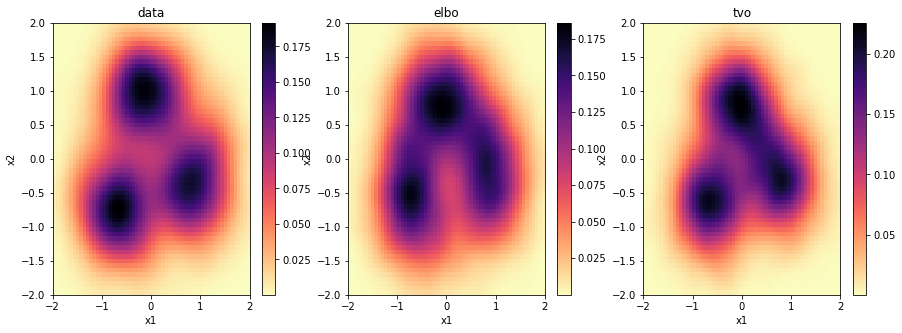

In [13]:
# Visualize PDF by a helper function
utils.compare_VAE(elbo_vae_instance, tvo_vae_instance, x_train,
                 number_samples=10000, x_var=0.2,
                 lim=2,
                 c_map='magma_r')